# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN is a popular clustering algorithm used in unsupervised machine learning. Unlike K-Means, DBSCAN does not require the number of clusters to be specified before running the algorithm. Instead, it groups points that are close together based on a distance measurement, and marks points that are in low-density regions as outliers.

## **1. What is DBSCAN?**

DBSCAN is a density-based clustering algorithm that works by identifying dense regions of data and expanding clusters from them. It is well-suited for datasets with varying shapes and sizes, and it is particularly effective at identifying outliers.

### **Key Concepts**:

- **Core Points**: Points that have a minimum number of points (MinPts) within a specified radius (ε).
- **Border Points**: Points that are not core points, but are within the ε-radius of a core point.
- **Noise Points**: Points that are neither core points nor border points; these are considered outliers.

##
---

## **2. DBSCAN Clustering Process**

The main idea of DBSCAN is to classify points based on the density of points around them. The algorithm can be summarized in the following steps:

1. **Select a point randomly** from the dataset.
2. **Check if the point has at least `MinPts` within its `ε`-radius**. If it does, it is a core point, and a cluster is formed around it.
3. **Expand the cluster** by checking the neighboring points of core points. Any point within the `ε`-radius of a core point is added to the cluster.
4. **Mark points** that do not meet the criteria as noise or outliers.
5. **Repeat the process** until all points are either assigned to a cluster or marked as noise.

##
---

## **3. DBSCAN Parameters**

- **ε (epsilon)**: Defines the maximum distance between two points to be considered as neighbors. A small value of ε results in more clusters with fewer points per cluster, while a larger value merges nearby clusters.
  
- **MinPts**: The minimum number of points required to form a dense region (a cluster). Typically, MinPts is set to the dimensionality of the data plus one (e.g., for 2D data, MinPts = 3).


##
---

## **4. Mathematical Formulation of DBSCAN**

Given a dataset \( $X = \{x_1, x_2, \dots, x_n\} $\) where each \( $x_i$ \) is a point in an \( $m$ \)-dimensional space, DBSCAN works as follows:

1. **Neighborhood of a point**: For any point \( x \), its neighborhood is defined by the distance:
   $$
   \text{distance}(x_i, x_j) = || x_i - x_j || \leq \epsilon
   $$
   where \( $\epsilon$ \) is the distance threshold.
   
2. **Core Point**: A point \( $x_i$ \) is a core point if the number of points within its \( $\epsilon$ \)-radius is at least \( $MinPts$ \).

3. **Directly Density-Reachable**: A point \( $x_i$ \) is directly density-reachable from \( $x_j$ \) if \( $x_j$ \) is a core point and $$\text{distance}(x_i, x_j) \leq \epsilon $$.

4. **Density-Reachable**: A point \( $x_i$ \) is density-reachable from \( $x_j$ \) if there is a chain of points \( $x_i, x_{i+1}, \dots, x_j $\) such that each point is directly density-reachable from the previous one.

5. **Density-Connected**: Points \( $x_i$ \) and \( $x_j$ \) are density-connected if there exists a point \( $x_k$ \) such that both \( $x_i$ \) and \( $x_j$ \) are density-reachable from \( $x_k$ \).

##
---

## **5. DBSCAN Characteristics**

- **No Need to Specify the Number of Clusters**: Unlike K-Means, DBSCAN does not require the user to specify the number of clusters. It discovers the number of clusters based on density.
- **Ability to Identify Outliers**: DBSCAN automatically marks points that are in low-density regions as noise or outliers.
- **Non-Linear Cluster Shapes**: DBSCAN can discover clusters of arbitrary shapes, unlike K-Means, which tends to form spherical clusters.
- **Sensitivity to Parameters**: The quality of the results is highly dependent on the choice of \( $\epsilon $\) and \( $MinPts $\).

##
---

## **6. Advantages and Disadvantages of DBSCAN**

### **Advantages**:
- Can find arbitrarily shaped clusters.
- Does not require specifying the number of clusters in advance.
- Robust to noise and outliers.
- Handles clusters of varying sizes and densities.

### **Disadvantages**:
- Sensitive to the choice of \( $\epsilon $\) and $( MinPts )$.
- Struggles with datasets where clusters have very different densities.
- Not suitable for datasets with high dimensionality (curse of dimensionality).

##
---

## **7. Example Python Implementation of DBSCAN**

Let's implement DBSCAN using the **`sklearn`** library on a synthetic dataset.

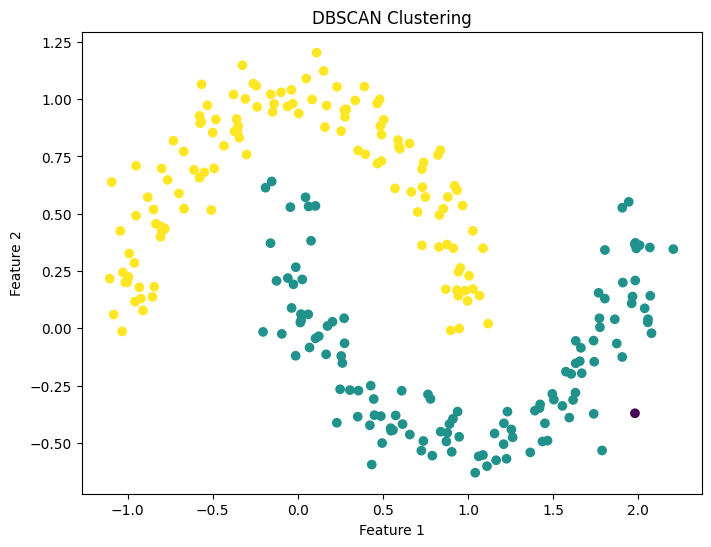

In [123]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate a synthetic dataset (two crescent-shaped clusters)
X, y = make_moons(n_samples=250, noise=0.1)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### **Explanation of Parameters**:

- **eps=0.2**: The maximum distance between two samples for one to be considered as in the neighborhood of the other.

- **min_samples=5**: The number of samples in a neighborhood for a point to be considered a core point.

##
---

## **8. Visualizing Clusters and Outliers**

DBSCAN can also identify `outliers` (points that are not part of any cluster). These points are labeled as `-1`.

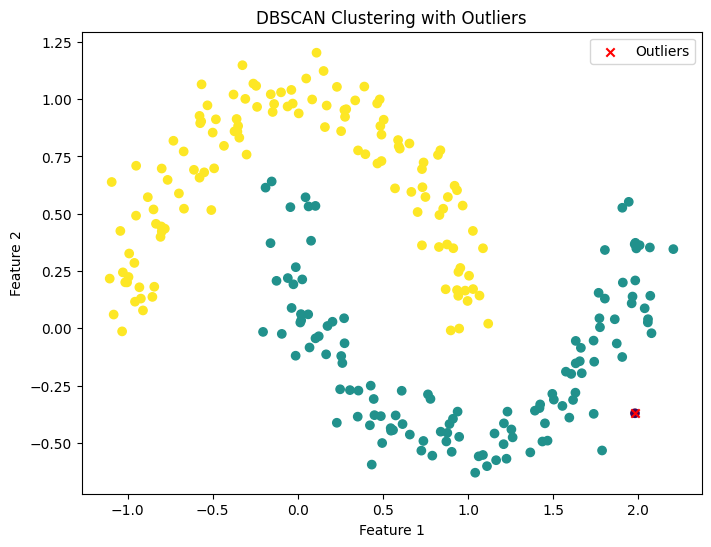

In [124]:
# Visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', marker='o')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], color='red', marker='x', label='Outliers')
plt.title("DBSCAN Clustering with Outliers")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

- Points marked with a red "x" are outliers, which DBSCAN identifies as points not belonging to any cluster.

##
---

## **9. DBSCAN vs K-Means**

| **DBSCAN**                                                  | **K-Means**                                          |
|-------------------------------------------------------------|------------------------------------------------------|
| Does not require the number of clusters to be specified.    | Requires the number of clusters to be specified.     |
| Can detect clusters of arbitrary shapes.                    | Assumes clusters to be spherical.                    |
| Can identify outliers and noise.                            | Cannot detect outliers.                              |



**Use Case:**

- Use `DBSCAN` for datasets with noise, arbitrary-shaped clusters, and when you want the algorithm to detect outliers.

- Use `K-Means` when you know the number of clusters in advance, and your clusters are roughly spherical and similar in size.


##
---

## **10. Tuning DBSCAN**

### **Choosing Epsilon ($\epsilon$)**:

- A good heuristic for selecting $\epsilon$ is to use a k-distance graph, which plots the distance to the k-th nearest neighbor for each point. The value of $\epsilon$ can be chosen at the "elbow" point of this graph.

#### Example Code to Compute k-distance Graph:

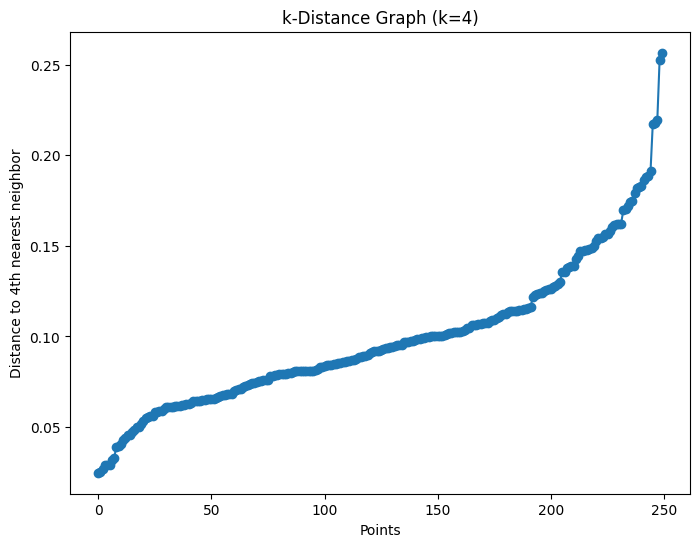

In [125]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-distance graph for k=4 (4th nearest neighbor)
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Plot the sorted k-distances
plt.figure(figsize=(8, 6))
plt.plot(np.sort(distances[:, 3]), marker='o')
plt.title("k-Distance Graph (k=4)")
plt.xlabel('Points')
plt.ylabel('Distance to 4th nearest neighbor')
plt.show()

##
---

## **11. Conclusion**

DBSCAN is a powerful and flexible clustering algorithm that works well in scenarios where you don’t know the number of clusters in advance and where clusters are irregularly shaped. However, it requires careful tuning of the parameters $\epsilon$ and MinPts to get the best results. Its ability to handle noise and outliers makes it a valuable tool in many real-world clustering problems.

##
----